In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Data Analysis

In [99]:
trip = pd.read_csv('tripA_wrangled.csv',  index_col = 0)

### First, a glimpse at the data set

In [100]:
trip.shape

(12446, 7)

In [101]:
trip.head()

,name,cuisine,price,rank,neighborhood,reviews,avg
0,Piccola Cucina Osteria,Italian,2.0,1,Manhattan,2012.0,4.5
1,Club A Steakhouse,American,3.0,2,Manhattan,3501.0,4.5
2,SottoCasa Pizzeria,Pizza,2.0,3,Manhattan,327.0,5.0
3,Boucherie Union Square,French,3.0,4,Manhattan,641.0,5.0
4,Piccola Cucina,Italian,2.0,5,Manhattan,704.0,4.5


In [102]:
trip.count()

name            12446
cuisine          9198
price            7617
rank            12446
neighborhood    12446
reviews         11079
avg             12446
dtype: int64

In [103]:
trip.describe()

,price,reviews,avg
count,7617.000000,11079.000000,12446.000000
mean,1.821583,112.648344,4.132733
std,0.540693,454.128082,0.579253
min,1.000000,2.000000,1.000000
25%,1.000000,6.000000,4.000000
50%,2.000000,21.000000,4.000000
75%,2.000000,76.000000,4.500000
max,3.000000,19916.000000,5.000000


In [104]:
trip[['name', 'cuisine', 'neighborhood']].describe()

,name,cuisine,neighborhood
count,12446,9198,12446
unique,10897,88,50
top,Subway,American,Manhattan
freq,150,2298,8897


### Analysing data from cuisine

In [105]:
trip['cuisine'].value_counts().head(20)

American         2298
Italian          1323
Japanese          589
Mexican           519
Chinese           492
Bar               435
Asian             423
French            308
Pizza             282
Mediterranean     273
Cafe              255
Indian            244
Latin             136
Fast Food         122
Seafood           114
Sushi              93
Caribbean          92
Spanish            81
Deli               75
Thai               73
Name: cuisine, dtype: int64

Text(0.5, 0, 'Cuisine')

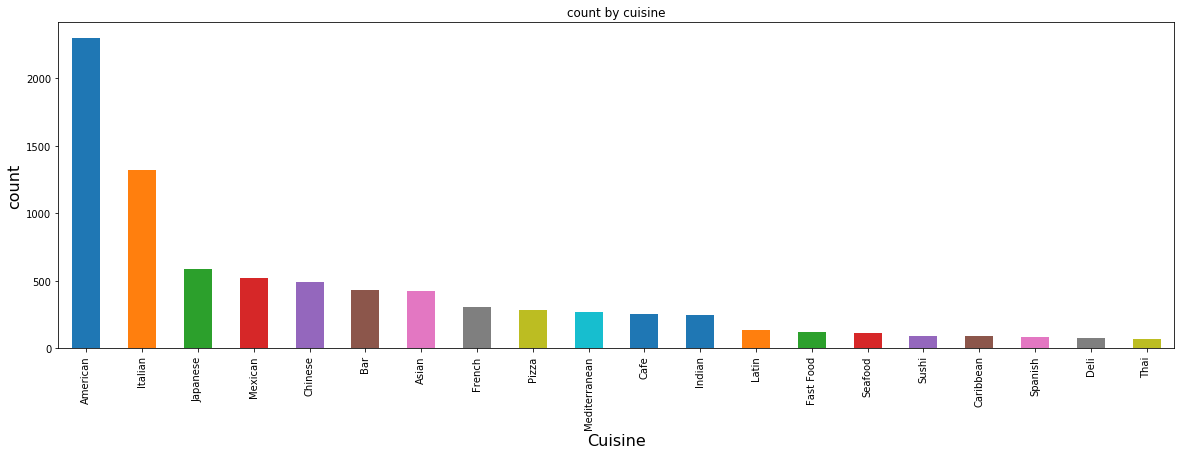

In [106]:
trip['cuisine'].value_counts().head(20).plot.bar()
plt.ylabel('count', fontsize=16)
plt.title('count by cuisine')
plt.xlabel('Cuisine', fontsize=16)

#### AVG number of reviews by cuisine type

In [107]:
trip.groupby('cuisine')['reviews'].mean().sort_values(ascending=False).head(20)

cuisine
Russian                549.000000
American               241.995428
French                 234.184300
Italian                212.781761
Malaysian              211.000000
International          202.555556
Seafood                193.725490
Gastropub              173.666667
Irish                  165.500000
New Zealand            165.500000
Croatian               159.000000
Contemporary           157.700000
Afghani                155.000000
Steakhouse             151.533333
Canadian               129.000000
Brazilian              124.684211
Gluten Free Options    123.333333
Grill                  114.000000
Barbecue               113.920000
Moroccan               107.062500
Name: reviews, dtype: float64

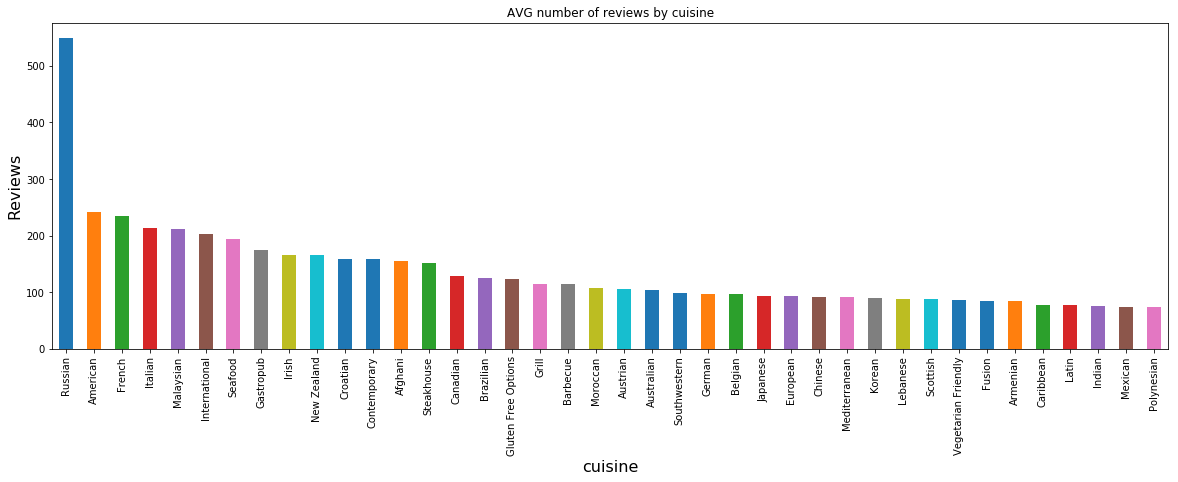

In [108]:
plt.figure(figsize=(20,6))
plt.ylabel('Reviews', fontsize=16)
plt.xlabel('Cuisine', fontsize=16)
plt.title('AVG number of reviews by cuisine')
trip.groupby('cuisine')['reviews'].mean().sort_values(ascending=False).head(40).plot.bar()

#### Average prices by type of food "cuisine"

In [109]:
trip.groupby('cuisine')['price'].mean().sort_values(ascending=False).head(20)

cuisine
Gluten Free Options    3.000000
New Zealand            2.500000
Fusion                 2.500000
British                2.400000
Russian                2.333333
Contemporary           2.277778
Austrian               2.250000
Steakhouse             2.243243
French                 2.134058
European               2.117647
Moroccan               2.071429
Seafood                2.057471
Wine Bar               2.035714
Japanese               2.026000
Croatian               2.000000
Canadian               2.000000
Persian                2.000000
Cajun & Creole         2.000000
Gastropub              2.000000
Georgian               2.000000
Name: price, dtype: float64

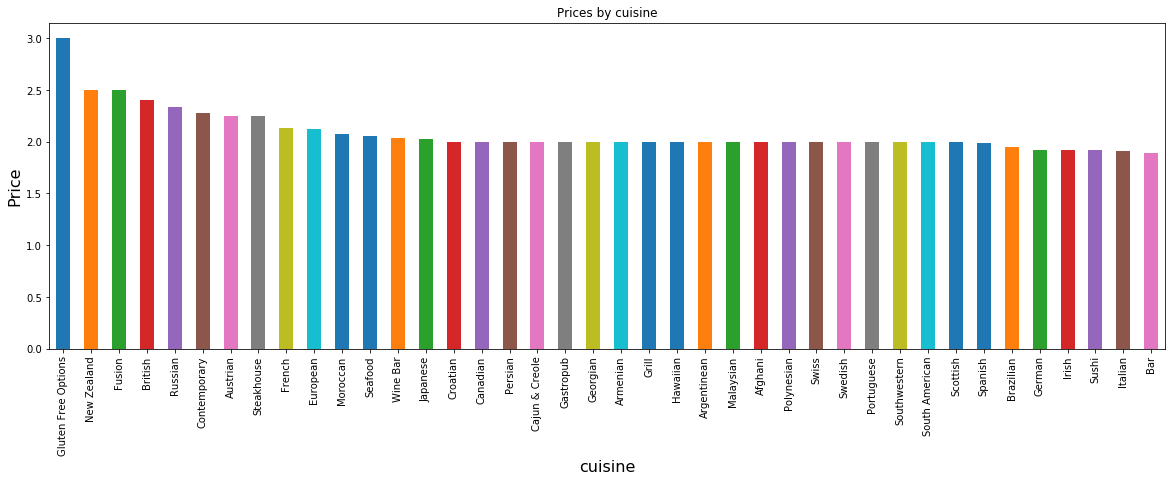

In [110]:
plt.figure(figsize=(20,6))
plt.ylabel('Price', fontsize=16)
plt.xlabel('Cuisine', fontsize=16)
plt.title('Prices by cuisine')
trip.groupby('cuisine')['price'].mean().sort_values(ascending=False).head(40).plot.bar()

#### AVG and price compared, grouped by cuisine

In [111]:
trip.groupby('cuisine')['avg', 'price'].mean().sort_values(by = 'price', ascending=False).head(10)

,avg,price
cuisine,,
Gluten Free Options,4.500000,3.000000
Fusion,4.250000,2.500000
New Zealand,4.500000,2.500000
British,4.000000,2.400000
Russian,3.500000,2.333333
Contemporary,4.225000,2.277778
Austrian,4.000000,2.250000
Steakhouse,4.255102,2.243243
French,4.238636,2.134058


<Figure size 1440x720 with 0 Axes>

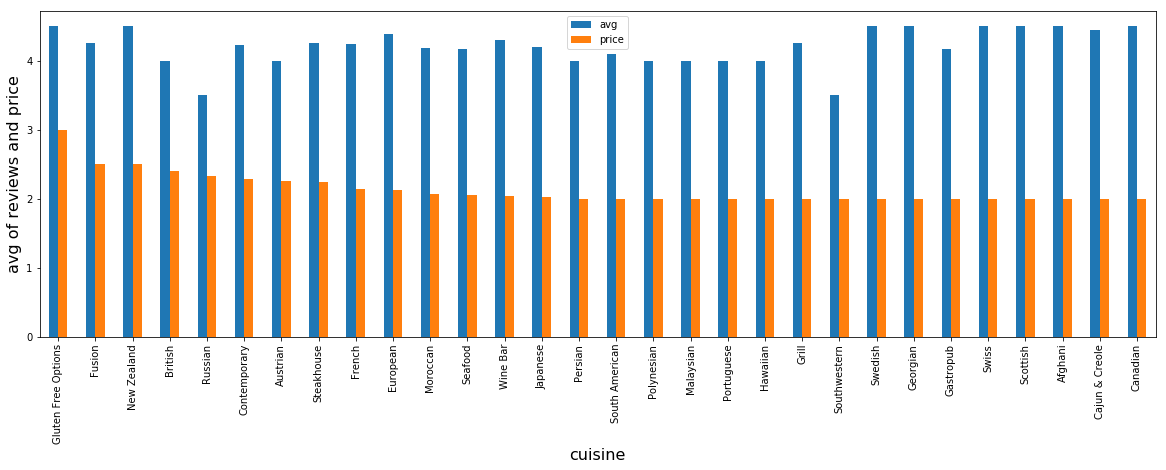

<Figure size 1440x720 with 0 Axes>

In [112]:
trip.groupby('cuisine')['avg', 'price'].mean().sort_values(by = 'price', ascending=False).head(30).plot.bar()
plt.ylabel('avg of reviews and price', fontsize=16)
plt.xlabel('cuisine', fontsize=16)
plt.figure(figsize=(20,10))

#### Making a copy of trip data set, then multiplying price and avg by 100 so it it's easier to visualize in the plots

In [113]:
trip_1 = trip.copy()
trip_1['price'] = trip['price']*100
trip_1['avg'] = trip['avg']*100

In [114]:
trip_1.groupby('cuisine')['reviews', "price", 'avg'].mean().sort_values(by = 'reviews', ascending=False).head(20)

,reviews,price,avg
cuisine,,,
Russian,549.000000,233.333333,350.000000
American,241.995428,188.499506,412.663185
French,234.184300,213.405797,423.863636
Italian,212.781761,191.248938,418.669690
Malaysian,211.000000,200.000000,400.000000
International,202.555556,185.000000,410.344828
Seafood,193.725490,205.747126,416.228070
Gastropub,173.666667,200.000000,416.666667
Irish,165.500000,191.666667,414.000000


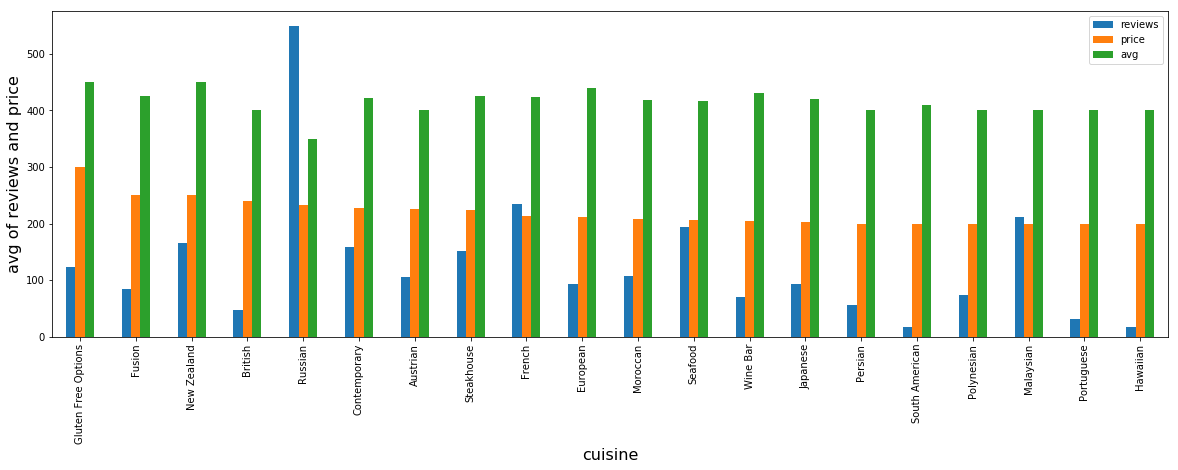

In [115]:
trip_1.groupby('cuisine')['reviews', 'price', 'avg'].mean().sort_values(by = 'price', ascending=False).head(20).plot.bar()
plt.ylabel('avg of reviews and price', fontsize=16)
plt.xlabel('cuisine', fontsize=16)
plt.rcParams['figure.figsize'] = 20,6

#### Reviews and prices grouped by cuisine

In [116]:
trip_1.groupby('cuisine')['reviews', "price"].mean().sort_values(ascending = False, by = 'reviews').head(20)

,reviews,price
cuisine,,
Russian,549.000000,233.333333
American,241.995428,188.499506
French,234.184300,213.405797
Italian,212.781761,191.248938
Malaysian,211.000000,200.000000
International,202.555556,185.000000
Seafood,193.725490,205.747126
Gastropub,173.666667,200.000000
Irish,165.500000,191.666667


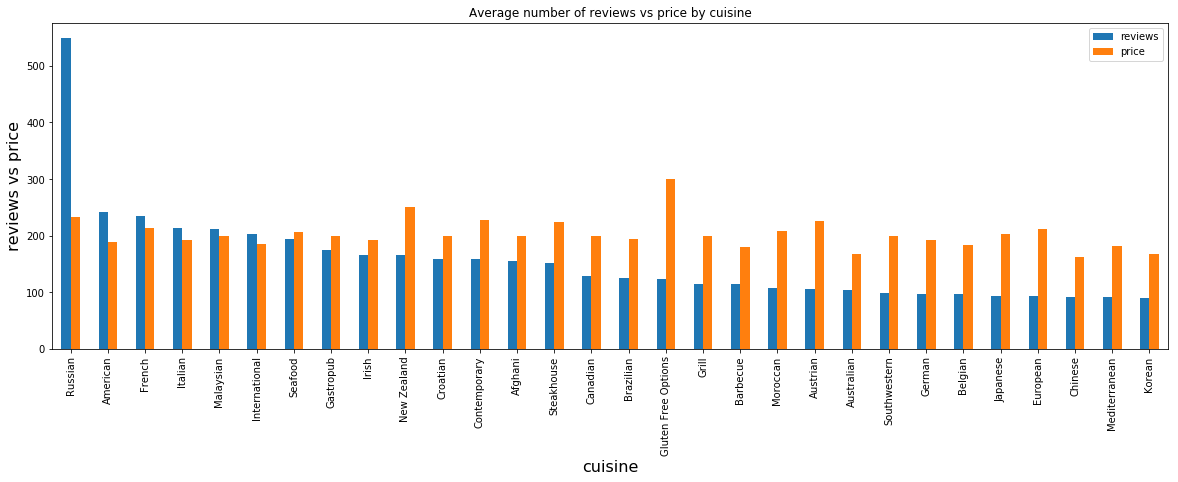

In [117]:
trip_1.groupby('cuisine')['reviews', "price"].mean().sort_values(ascending = False, by = 'reviews').head(30).plot.bar(title = ('Average number of reviews vs price by cuisine'))
plt.ylabel('reviews vs price', fontsize=16)
plt.xlabel('cuisine', fontsize=16)
plt.rcParams['figure.figsize'] = 20,6

## Analysing data by Neighborhood

### Average of reviews per restaurant in each neighborhood


In [118]:
trip.groupby('neighborhood')['reviews'].mean().sort_values(ascending=False).head(20)

neighborhood
 East Newark        494.000000
 Newark             336.142857
 Howard Beach       282.000000
 Rego Park          281.000000
 Corona             225.333333
 Rutherford         220.000000
 Glendale           214.000000
 Staten Island      177.437500
 Edgewater          160.500000
 East Elmhurst      155.000000
 Manhattan          138.635870
 Jackson Heights    134.666667
 Secaucus           106.793103
 Weehawken           91.222222
 Astoria             70.675000
 East Rutherford     67.000000
 North Bergen        65.952381
 Harrison            65.000000
 Elmhurst            64.000000
 Woodside            55.250000
Name: reviews, dtype: float64

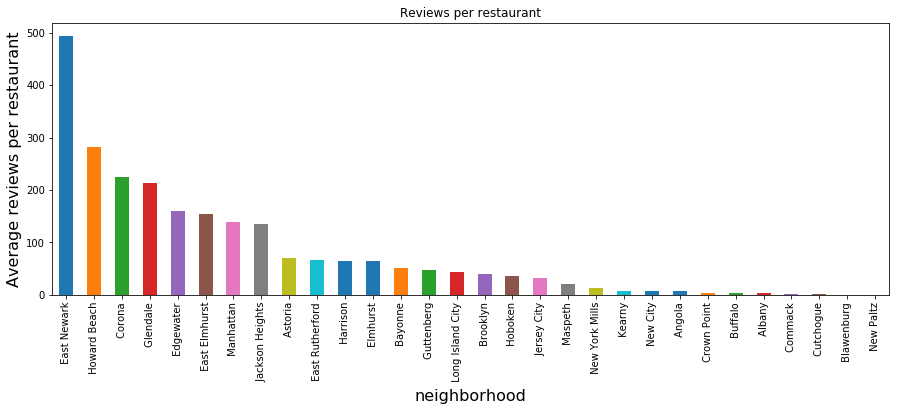

In [119]:
plt.figure(figsize=(15, 5))
plt.ylabel('Average reviews per restaurant', fontsize=16)
plt.xlabel('Neighborhood', fontsize=16)
plt.title('Reviews per restaurant')
trip.groupby('neighborhood')['reviews'].mean().head(30).sort_values(ascending=False).plot.bar()

#### Avg score grouped by neighborhood

In [120]:
trip.groupby('neighborhood')['avg'].mean().sort_values(ascending=False).head(20)

neighborhood
 Albany            5.000000
 Woodbourne        5.000000
 Blawenburg        5.000000
 Howard Beach      5.000000
 Harrison          5.000000
 Cutchogue         5.000000
 Ridgewood         4.545455
 Newport           4.500000
 Glendale          4.500000
 Elmhurst          4.500000
 East Newark       4.500000
 East Elmhurst     4.500000
 Rutherford        4.500000
 New York Mills    4.500000
 Tennent           4.500000
 Corona            4.500000
 Commack           4.500000
 West Chazy        4.500000
 Kearny            4.500000
 Staten Island     4.468750
Name: avg, dtype: float64

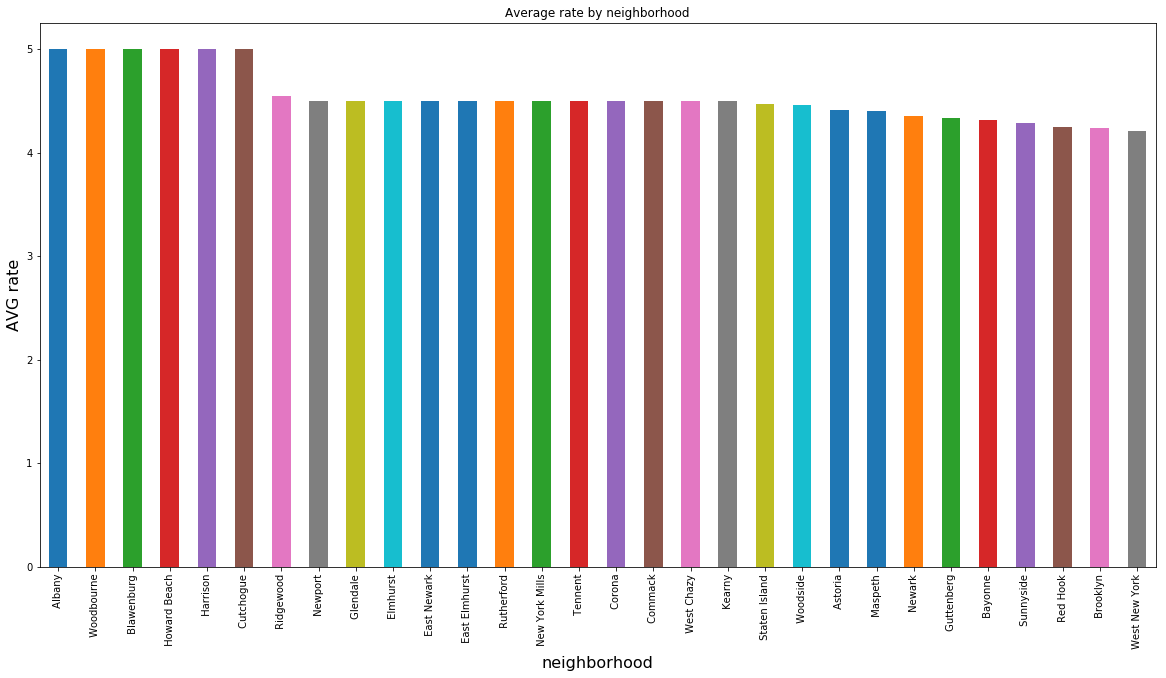

In [121]:
plt.figure(figsize=(20,10))
plt.ylabel('AVG rate', fontsize=16)
plt.xlabel('Neighborhood', fontsize=16)
trip.groupby('neighborhood')['avg'].mean().sort_values(ascending=False).head(30).plot.bar(title = 'Average rate by neighborhood')

In [122]:
trip.head()

,name,cuisine,price,rank,neighborhood,reviews,avg
0,Piccola Cucina Osteria,Italian,2.0,1,Manhattan,2012.0,4.5
1,Club A Steakhouse,American,3.0,2,Manhattan,3501.0,4.5
2,SottoCasa Pizzeria,Pizza,2.0,3,Manhattan,327.0,5.0
3,Boucherie Union Square,French,3.0,4,Manhattan,641.0,5.0
4,Piccola Cucina,Italian,2.0,5,Manhattan,704.0,4.5


#### Avg score and price grouped by neighborhood 

In [123]:
trip.groupby('neighborhood')['avg', 'price'].mean().sort_values(ascending=False, by = 'price').head(20)

,avg,price
neighborhood,,
Rutherford,4.500000,3.0
Edgewater,4.125000,2.5
Woodside,4.461538,2.0
Harrison,5.000000,2.0
New Paltz,4.000000,2.0
Newport,4.500000,2.0
Rego Park,4.000000,2.0
Jackson Heights,4.166667,2.0
Howard Beach,5.000000,2.0


Text(0.5, 0, 'neigborhood')

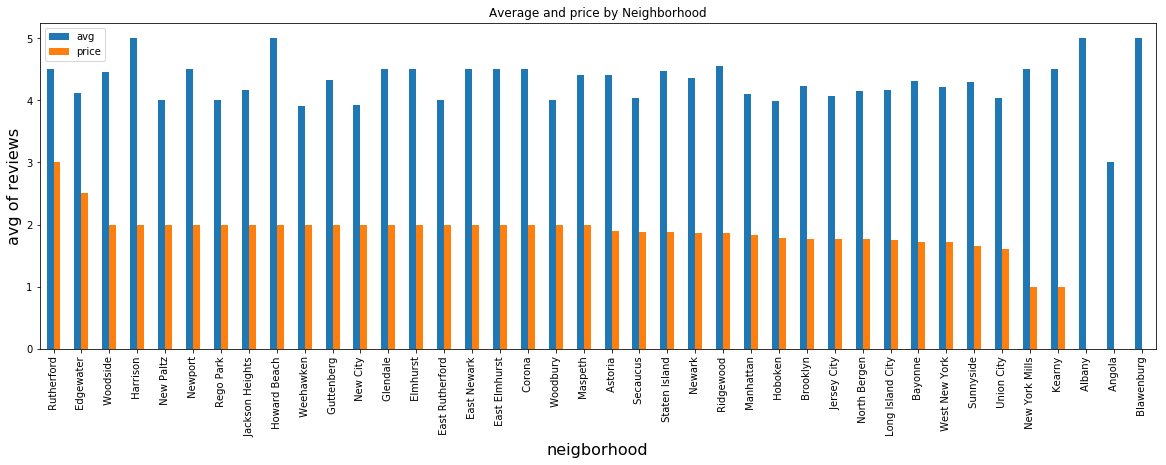

In [124]:
plt.rcParams['figure.figsize'] = 20,6
trip.groupby('neighborhood')['avg', 'price'].mean().sort_values(ascending=False, by = 'price').head(40).plot.bar(title = 'Average and price by Neighborhood')
plt.ylabel('avg of reviews', fontsize=16)
plt.xlabel('neigborhood', fontsize=16)

#### Reviews and avg rating grouped by neighborhood

In [125]:
trip_1.groupby('neighborhood')['reviews', 'avg'].sum().sort_values(ascending=False, by = 'avg').head(24)

,reviews,avg
neighborhood,,
Manhattan,1122396.0,3654250.0
Brooklyn,76810.0,992000.0
Jersey City,10810.0,168550.0
Hoboken,6735.0,82700.0
Long Island City,6632.0,68650.0
Astoria,5654.0,35300.0
Union City,655.0,33850.0
Sunnyside,1070.0,26150.0
Secaucus,3097.0,11700.0


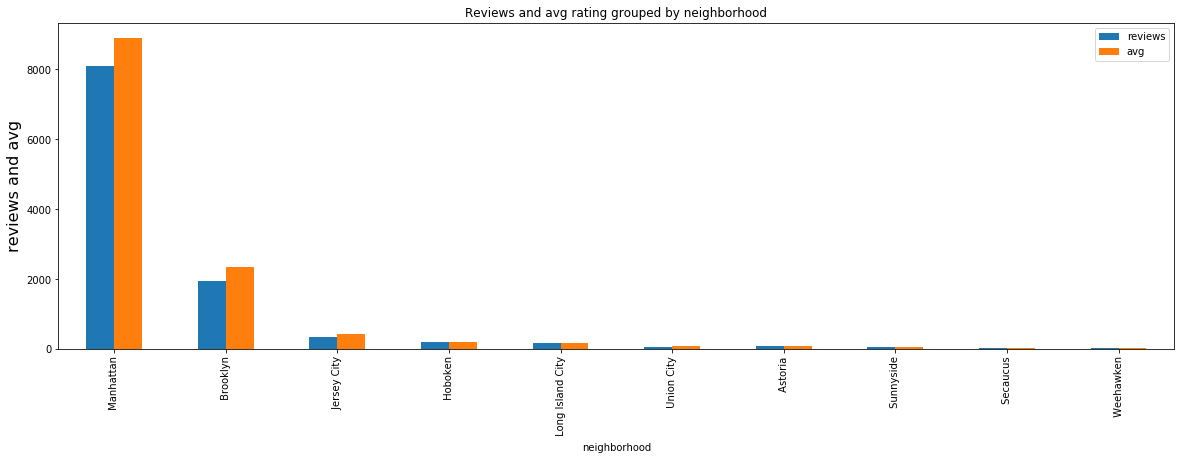

In [126]:
trip_1.groupby('neighborhood')['reviews', 'avg'].count().sort_values(ascending=False, by = 'avg').head(10).plot.bar(title = 'Reviews and avg rating grouped by neighborhood')
plt.ylabel('reviews and avg', fontsize=16)
plt.rcParams['figure.figsize'] = 20,6

#### Grouping by neigborhood and comparing with cuisine, price, avg and reviews

In [149]:
trip.groupby('neighborhood')['price', 'avg', 'reviews'].mean().sort_values(ascending = False, by = 'reviews').head(20)

,price,avg,reviews
neighborhood,,,
East Newark,2.000000,4.500000,494.000000
Newark,1.857143,4.357143,336.142857
Howard Beach,2.000000,5.000000,282.000000
Rego Park,2.000000,4.000000,281.000000
Corona,2.000000,4.500000,225.333333
Rutherford,3.000000,4.500000,220.000000
Glendale,2.000000,4.500000,214.000000
Staten Island,1.875000,4.468750,177.437500
Edgewater,2.500000,4.125000,160.500000


Text(0, 0.5, 'price, avg and reviews')

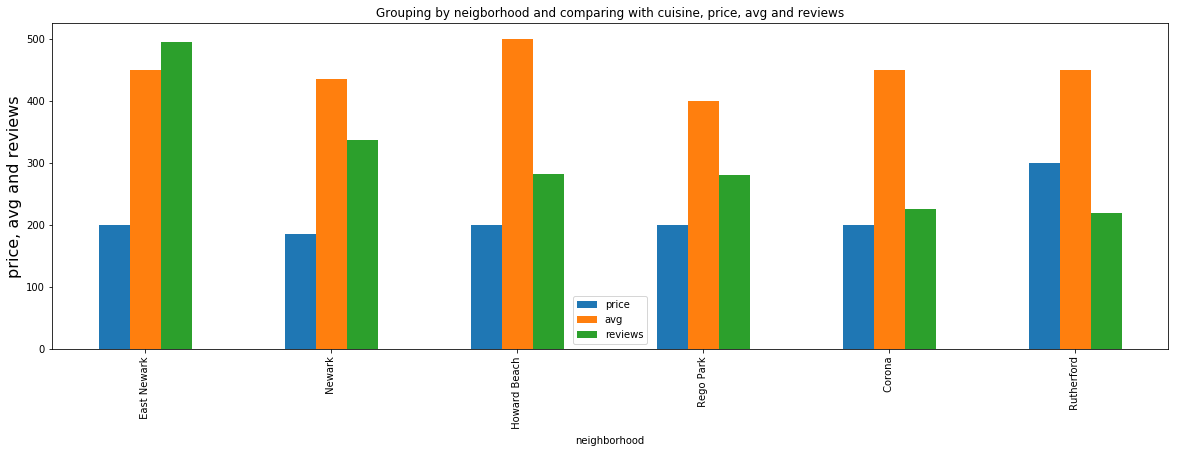

In [144]:
plt.rcParams['figure.figsize'] = 20,6
trip_1.groupby('neighborhood')['price', 'avg', 'reviews'].mean().sort_values(ascending = False, by = 'reviews').head(6).plot.bar(title = 'Grouping by neigborhood and comparing with cuisine, price, avg and reviews')
plt.ylabel('price, avg and reviews', fontsize=16)